<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>👩🏻‍💻  Parkinsson Disease Detection </b></h1></center>

<h8><b style="color:red; font-size: 18px;">Question: Using numpy, matplotlib, sklearn libraries, how can you predict whether a person has
Parkinson’s disease or not? </b></h8>

<center><h1 style="background-color: darkgreen; color: white; font-size: 2.5px;"><b> <div style="text-align;">
    <span style="font-size:24px;">Content:</span><br><br></div></b></h1></center>
    <span style="font-size:20px;">📈 Descriptive analytics</span><br>
    <span style="font-size:20px;">🔧 Preprocessing</span><br>
    <span style="font-size:20px;">🛠️ Modelling</span><br>
    <span style="font-size:20px;">📝 Adding Columns</span><br>
    <span style="font-size:20px;">🧪 Testing</span>

In [68]:
# Let's import libraries for data preprocessing and model evaluation
from sklearn.preprocessing import MinMaxScaler  # Data scaling
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.metrics import f1_score, accuracy_score ,classification_report # Model evaluation metrics
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Random Forest and Gradient Boosting models
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron model
from sklearn.svm import LinearSVC  # Support Vector Machine model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Hyperparameter tuning
import matplotlib.pyplot as plt  # Data visualization
import statsmodels.api as sm  # Statistical modeling
import seaborn as sns  # Data visualization
import xgboost as xgb  # XGBoost model
import warnings as wg  # Suppressing warnings
from sklearn.utils import resample # Solving of imbalanced dataframe
from sklearn.tree import DecisionTreeClassifier
# Suppressing warnings
wg.filterwarnings('ignore')

# Set display option to show all columns
pd.set_option('display.max_columns', None)

In [6]:
# Firstly , let's  ignore warnings
wg.filterwarnings('ignore')

In [75]:
# Let's import cardio dataset
df = pd.read_csv('Parkinsson disease.csv')

In [8]:
# Let's look at dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>📈 Descriptive analytics </b></h1></center>

In [9]:
#Let's examine null values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
#Let's examine correlation cardio with other columns
df.drop('name' , axis = 1).corr()['status'][:-1]

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
Name: status, dtype: float64

In [12]:
#Let's look at descriptive analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [13]:
#Let's examine dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [14]:
#Let's look at data types of columns 
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [15]:
#Let's examine number of unique values for all columns
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [16]:
#Let's examine value counts for all columns
for i in df.columns:
    print(f"{str(i).capitalize()}: ") 
    print(df[i].value_counts())
    print("=========================")

Name: 
name
phon_R01_S01_1    1
phon_R01_S35_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S18_5    1
phon_R01_S50_6    1
Name: count, Length: 195, dtype: int64
Mdvp:fo(hz): 
MDVP:Fo(Hz)
119.992    1
169.774    1
156.239    1
145.174    1
138.145    1
          ..
136.969    1
143.533    1
148.090    1
142.729    1
214.289    1
Name: count, Length: 195, dtype: int64
Mdvp:fhi(hz): 
MDVP:Fhi(Hz)
157.302    1
191.759    1
195.107    1
198.109    1
197.238    1
          ..
166.607    1
162.215    1
162.824    1
162.408    1
260.277    1
Name: count, Length: 195, dtype: int64
Mdvp:flo(hz): 
MDVP:Flo(Hz)
74.997     1
151.451    1
79.820     1
80.637     1
81.114     1
          ..
66.004     1
65.809     1
67.343     1
65.476     1
77.973     1
Name: count, Length: 195, dtype: int64
Mdvp:jitter(%): 
MDVP:Jitter(%)
0.00694    3
0.00742    3
0.00369    3
0.00784    2
0.00314    2
    

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>🚫 Let's remove unnecessary variables </b></h1></center>

In [17]:
#Let's examine cardinality
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [18]:
#Let's remove name column becouse all values is unique
del df['name']

<Axes: >

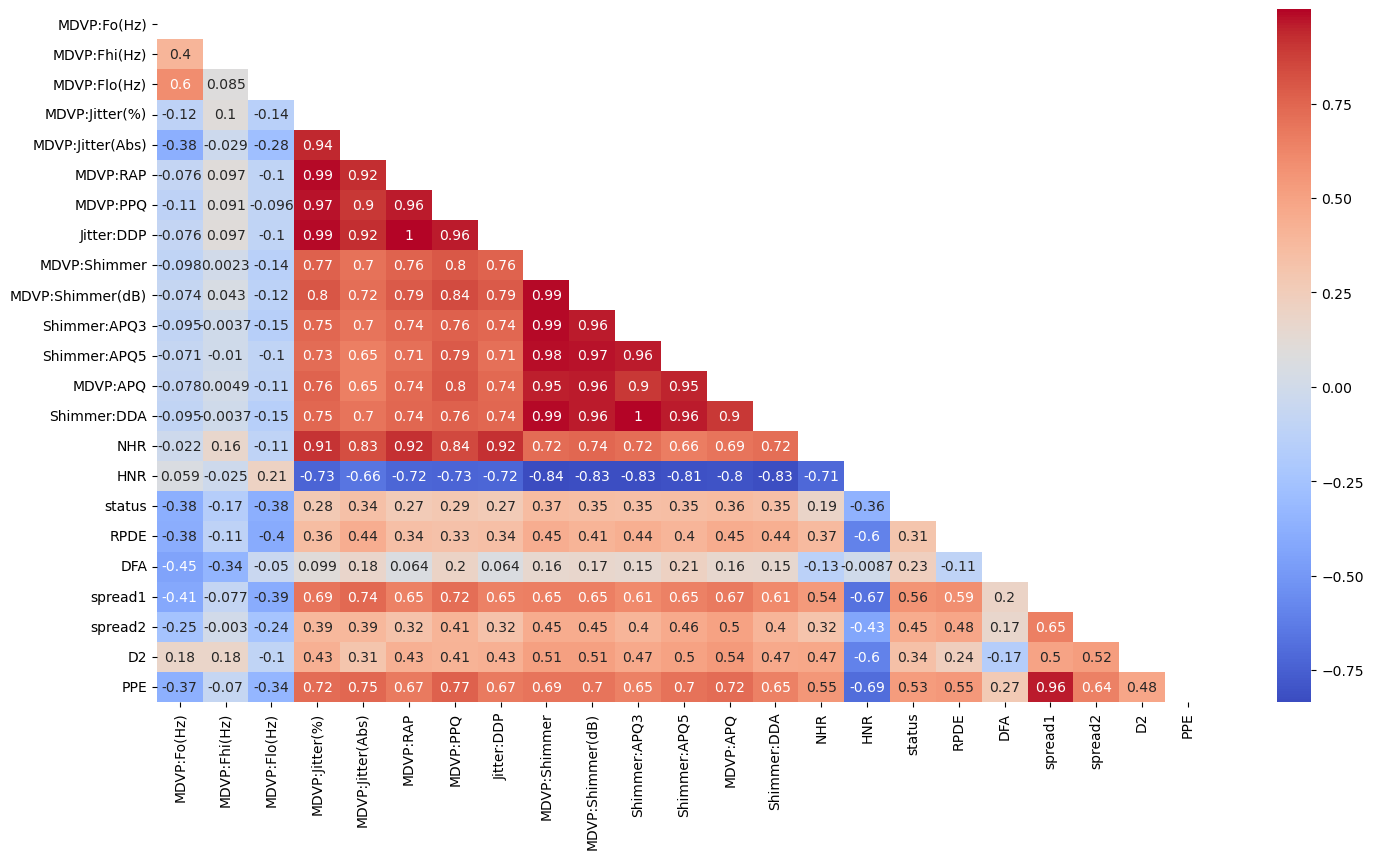

In [19]:
#Let's consider the columns that are highly correlated with others
#Let's calculate the correlation matrix
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(17, 9))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')

In [20]:
#Let's find vif
#Independent value
columns = list(df.columns)

# Add a constant column to the dataframe
df_with_constant = sm.add_constant(df[columns])

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = df_with_constant.columns
vif["VIF"] = [sm.OLS(df_with_constant[col], df_with_constant.drop(col, axis=1)).fit().rsquared for col in df_with_constant.columns]

In [21]:
#Let's look at vif data frame
vif

,Variable,VIF
0,const,0.999601
1,MDVP:Fo(Hz),0.861199
2,MDVP:Fhi(Hz),0.362961
3,MDVP:Flo(Hz),0.558250
4,MDVP:Jitter(%),0.994994
5,MDVP:Jitter(Abs),0.978862
6,MDVP:RAP,0.999999
7,MDVP:PPQ,0.990758
8,Jitter:DDP,0.999999
9,MDVP:Shimmer,0.998689


<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>🔎 Let's examine target value </b></h1></center>

In [22]:
#Let's check the balance
df.status.value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [23]:
#Let's examine correlation cardio with other columns
df.corr()['status'][:-1]

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
Name: status, dtype: float64

In [66]:
#Let's assign target and explanatory values
y = df['status']
X = df.drop('status',axis =1)

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> 🛠️ Modelling </b></h1></center>

In [25]:
#Let's create random forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42 , max_depth = 5 , min_samples_leaf = 4) 

In [26]:
#Let's divide dataset test/train 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

In [27]:
#Let's fit train values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [28]:
print("Accuracy Score (Train): ", accuracy_score(y_train,rf_classifier.predict(X_train)))
print("Accuracy Score (Test): ", accuracy_score(y_test,rf_classifier.predict(X_test)))
print("F1 Score: ", f1_score(y_test,rf_classifier.predict(X_test)))

Accuracy Score (Train):  0.9743589743589743
Accuracy Score (Test):  0.9487179487179487
F1 Score:  0.9696969696969697


In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_test, rf_classifier.predict(X_test))
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> 🌳 Decision Tree </b></h1></center>

In [74]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with parameters
clf = DecisionTreeClassifier(max_depth=3 , min_samples_split=2)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = clf.predict(X_train)

# Calculate the accuracy of the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the testing data
y_test_pred = clf.predict(X_test)

# Calculate the accuracy of the model on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9743589743589743
Testing Accuracy: 0.9230769230769231

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



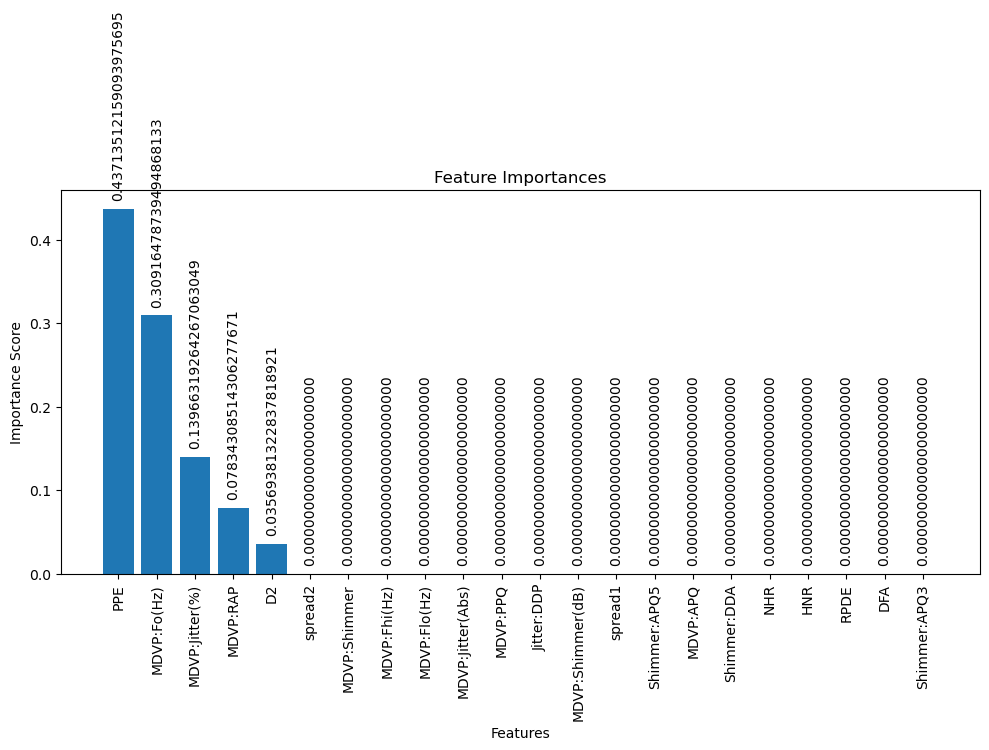

In [85]:
# Get feature importances
importances = clf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()

for i, v in enumerate(importances[indices]):
    plt.text(i, v + 0.01, f'{v:.20f}', ha='center', va='bottom', rotation=90)

plt.show()

In [91]:
df[['status','PPE',
 'MDVP:Fo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:RAP',
 'D2']]

,status,PPE,MDVP:Fo(Hz),MDVP:Jitter(%),MDVP:RAP,D2
0,1,0.284654,119.992,0.00784,0.00370,2.301442
1,1,0.368674,122.400,0.00968,0.00465,2.486855
2,1,0.332634,116.682,0.01050,0.00544,2.342259
3,1,0.368975,116.676,0.00997,0.00502,2.405554
4,1,0.410335,116.014,0.01284,0.00655,2.332180
...,...,...,...,...,...,...
190,0,0.133050,174.188,0.00459,0.00263,2.657476
191,0,0.168895,209.516,0.00564,0.00331,2.784312
192,0,0.131728,174.688,0.01360,0.00624,2.679772
193,0,0.123306,198.764,0.00740,0.00370,2.138608


<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> 📝 Adding Columns </b></h1></center>

In [30]:
new_df = df.copy()

In [31]:
# Create new feature columns
new_df['Jitter:Shimmer_Ratio'] = df['MDVP:Jitter(%)'] / df['MDVP:Shimmer']
new_df['Shimmer:APQ'] = df['Shimmer:APQ3'] + df['Shimmer:APQ5']
new_df['Jitter:RAP'] = df['MDVP:Jitter(%)'] / df['MDVP:RAP']
new_df['Shimmer:DDA_NHR_Ratio'] = df['Shimmer:DDA'] / df['NHR']

In [32]:
#Let's assign target and explanatory values
y = new_df['status']
X = new_df.drop('status',axis =1)

In [33]:
#Let's divide dataset test/train 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

In [34]:
#Let's fit train values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [35]:
print("Accuracy Score (Train): ", accuracy_score(y_train,rf_classifier.predict(X_train)))
print("Accuracy Score (Test): ", accuracy_score(y_test,rf_classifier.predict(X_test)))
print("F1 Score: ", f1_score(y_test,rf_classifier.predict(X_test)))

Accuracy Score (Train):  0.9807692307692307
Accuracy Score (Test):  0.9487179487179487
F1 Score:  0.9696969696969697


In [36]:
report = classification_report(y_test, rf_classifier.predict(X_test))
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39




<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> 📝 Logarithm </b></h1></center>

In [37]:
new2_df = df.copy()

In [38]:
#Let's find logarithm which correlation is high with target value
for a in ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']:
    new_col = a + "_log"
    new2_df[new_col] = np.log1p(new2_df[a])
    new2_df[new_col] = new2_df[new_col].replace(np.inf, 0)
    corr = new2_df[[new_col, 'status']].corr().loc[new_col, 'status']
    if np.abs(corr) < 0.25:
        del new2_df[new_col]

In [39]:
new2_df.corr()['status']

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
MDVP:Fo(Hz)_log    -0.337735
MDVP:Flo(Hz)_log   -0.345584
Name: status, dtype: float64

In [40]:
#Let's assign target and explanatory values
y = new2_df['status']
X = new2_df.drop('status',axis =1)

In [41]:
#Let's divide dataset test/train 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

In [42]:
#Let's fit train values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [43]:
print("Accuracy Score (Train): ", accuracy_score(y_train,rf_classifier.predict(X_train)))
print("Accuracy Score (Test): ", accuracy_score(y_test,rf_classifier.predict(X_test)))
print("F1 Score: ", f1_score(y_test,rf_classifier.predict(X_test)))

Accuracy Score (Train):  0.967948717948718
Accuracy Score (Test):  0.9230769230769231
F1 Score:  0.955223880597015


<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> 📝 Square Root </b></h1></center>

In [44]:
new3_df = df.copy()

In [45]:
#Let's find square root which correlation is high with target value
for a in ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']:
    new_col = a +  "_power"
    new3_df[new_col] = np.sqrt(new3_df[a])
    corr = new3_df[[new_col, 'status']].corr().loc[new_col, 'status']
    if np.abs(corr) < 0.20:
        del new3_df[new_col]

In [46]:
# Calculate correlation and filter
filtered_corr = np.abs(new3_df.corr()['status']) < 0.25
filtered_columns = filtered_corr[filtered_corr].index
filtered_columns

Index(['MDVP:Fhi(Hz)', 'NHR', 'DFA'], dtype='object')

In [47]:
#Let's assign target and explanatory values
y = new3_df['status']
X = new3_df.drop(['MDVP:Fhi(Hz)', 'NHR', 'DFA' , 'status'] , axis = 1)

In [48]:
#Let's divide dataset test/train 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

In [49]:
#Let's fit train values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [50]:
print("Accuracy Score (Train): ", accuracy_score(y_train,rf_classifier.predict(X_train)))
print("Accuracy Score (Test): ", accuracy_score(y_test,rf_classifier.predict(X_test)))
print("F1 Score: ", f1_score(y_test,rf_classifier.predict(X_test)))

Accuracy Score (Train):  0.967948717948718
Accuracy Score (Test):  0.8974358974358975
F1 Score:  0.9393939393939394


<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> 📇 Re-balancing </b></h1></center>

In [51]:
new4_df = df.copy()

In [52]:
#Let's check balance of dataset
new4_df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [53]:
# Let's solve imbalanced problem
df_majority = new4_df[new4_df['status'] == 0]
df_minority = new4_df[new4_df['status'] == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),  # Match number of majority class
                                 random_state=42)  # Reproducible results

new4_df = pd.concat([df_majority, df_minority_upsampled])

In [54]:
# Let's look at first 5 rows
new4_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,0.097,0.00563,0.00680,0.00802,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,0.00504,0.00641,0.00762,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,0.00640,0.00825,0.00951,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,0.00469,0.00606,0.00719,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,0.00468,0.00610,0.00726,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


In [55]:
#Let's assign target and explanatory values
y = new4_df['status']
X = new4_df.drop('status' , axis = 1)

In [56]:
#Let's divide dataset test/train 
train_x , test_x , train_y , test_y = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

### We see that balance of dataset is 1:1 (it's great!!!) 

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> ♻️ Model Tuning  </b></h1></center>

In [58]:
model_mlp = MLPClassifier(random_state=1, max_iter=200)
model_mlp.fit(train_x, train_y)
print("MLP Classifier: ",f1_score(test_y,model_mlp.predict(test_x))) 

model_rfc = RandomForestClassifier(n_estimators = 100 ,max_depth=7, random_state=0)
model_rfc.fit(train_x, train_y)
print("Random Forest Classifier: ",f1_score(test_y,model_rfc.predict(test_x)))

model_svc = LinearSVC()
model_svc.fit(train_x, train_y)
print("Linear SVC: ",f1_score(test_y,model_svc.predict(test_x)))

MLP Classifier:  0.7999999999999999
Random Forest Classifier:  1.0
Linear SVC:  0.5882352941176471


<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> 🛠️ Extreme Gradient Boost </b></h1></center>

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42 , n_estimators = 53 ,max_depth = 7 , min_samples_leaf = 5 , max_leaves = 115 , min_leaves = 60)

In [61]:
# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

[20:07:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_leaves", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=115, min_child_weight=1,
              min_leaves=60, min_samples_leaf=5, missing=nan,
              monotone_constraints='()', n_estimators=53, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [62]:
# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)
y_predtr = xgb_classifier.predict(X_train)

In [63]:
# Calculate the accuracy score
print("Accuracy Score (Train): ", accuracy_score(y_train,y_predtr))
print("Accuracy Score (Test): ", accuracy_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

Accuracy Score (Train):  1.0
Accuracy Score (Test):  0.9
F1 Score:  0.9


<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> 📌The End </b></h1></center>